<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab 2: *Statistics & Data Visualization***

### **Tenggat Waktu: 16 September 2023, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab2_1806205773_Abdurrafi Arief.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 16 September 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [105]:
# Isi dengan data diri Anda
NAMA = "Alvaro Austin"
KELAS = "B"
NPM = "2106752180"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [106]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Alvaro Austin dari kelas B dengan NPM 2106752180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Alvaro Austin)


# Exploratory Data Analysis

*Exploratory Data Analysis* (EDA) adalah suatu proses dalam melakukan analisis terhadap dataset dengan tujuan untuk melihat karakteristik utama dari data tersebut. EDA merupakan pemrosesan dasar yang hasilnya dapat mempengaruhi keputusan-keputusan yang diambil oleh seorang data scientist dalam melakukan pemrosesan data di tahap selanjutnya. Pada proses ini sering melibatkan dua hal yang akan kita pelajari pada Lab kali ini, yaitu *descriptive statistics* dan data *visualization*.

## Deskripsi Dataset Smartphone Specification

Dataset yang digunakan pada Lab kali ini merepresentasikan data spesifikasi dari *smartphone* yang beredar pada pasar saat ini. Berikut merupakan deskripsi dari setiap kolom yang ada pada dataset tersebut

* `Brand` : Nama Merk/Brand *smartphone*
* `Phone` : Nama Tipe/Model *smartphone*
* `Price` : Harga *smartphone*
* `Screensize (inches)` : Ukuran layar *smartphone* dalam satuan inci
* `Camera_Nos` : Jumlah kamera belakang pada *smartphone*
* `Front Camera (MP)` : Besar Megapixel kamera depan *smartphone*
* `Rear Camera (MP)` :  Besar Megapixel kamera depan *smartphone*
* `Memory (GB)` : Besar penyimpanan dalam Gigabyte
* `RAM (GB)` : Besar RAM dalam Gigabyte
* `Battery (mAh)` : Besar baterai Smartphone
* `Rating` : Penilaian produk smartphone tersebut

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_csv('SmartphoneSpecs.csv')

In [109]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 910
Jumlah atribut: 11


,Brand,Phone,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
0,Xiaomi,Xiaomi Redmi Note 10,13999,6.43,4,13.0,48.0,64.0,4.0,5000.0,3
1,Vivo,Vivo Y12s,9990,6.51,2,8.0,13.0,32.0,3.0,5000.0,1
2,Samsung,Samsung Galaxy M31s,15999,6.50,4,32.0,64.0,128.0,6.0,6000.0,2
3,Vivo,Vivo Y20,12990,6.51,3,8.0,13.0,64.0,4.0,5000.0,2
4,Realme,Realme 7i,13999,6.50,4,16.0,64.0,128.0,8.0,5000.0,3


In [110]:
# Menghitung jumlah data missing value per atribut
col_na = df.isnull().sum().sort_values(ascending=False)
percent = col_na / len(df)

missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

                     Total   Percent
Memory (GB)             29  0.031868
RAM (GB)                23  0.025275
Screensize (inches)     12  0.013187
Battery (mAh)            9  0.009890
Front Camera (MP)        8  0.008791
Rear Camera (MP)         3  0.003297


Karena terdapat missing value pada data tersebut dengan jumlah yang relatif kecil dengan nilai terbesar 0.032% saja. Maka dari itu, untuk saat ini kita akan menghapus baris data yang memiliki missing value tersebut. Untuk proses *pre-processing data* akan kalian pelajri secara lebih lanjut pada Lab selanjutnya.

In [111]:
# Hapus baris yang memiliki missing value
df.dropna(inplace=True)

In [112]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 848
Jumlah atribut: 11


,Brand,Phone,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
0,Xiaomi,Xiaomi Redmi Note 10,13999,6.43,4,13.0,48.0,64.0,4.0,5000.0,3
1,Vivo,Vivo Y12s,9990,6.51,2,8.0,13.0,32.0,3.0,5000.0,1
2,Samsung,Samsung Galaxy M31s,15999,6.50,4,32.0,64.0,128.0,6.0,6000.0,2
3,Vivo,Vivo Y20,12990,6.51,3,8.0,13.0,64.0,4.0,5000.0,2
4,Realme,Realme 7i,13999,6.50,4,16.0,64.0,128.0,8.0,5000.0,3


Dapat terlihat bahwa jumlah data telah berkurang dari yang sebelumnya berjumlah 910 data menjadi 848 data. Data yang dikurangi tersebut merupakan data yang memiliki missing value. Maka dari itu, tidak ada lagi data yang memiliki missing value yang dapat terlihat pada hasil perintah berikut

Pada Pandas, terdapat metode `.info()` yang berguna untuk mendapatkan ringkasan informasi dari DataFrame, termasuk nama-nama kolom, jumlah data yang tidak null (non-null), dan tipe data untuk setiap kolom. Penggunaan metode ini membantu kita dengan cepat memahami struktur DataFrame yang sedang kita kerjakan.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 909
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                848 non-null    object 
 1   Phone                848 non-null    object 
 2   Price                848 non-null    int64  
 3   Screensize (inches)  848 non-null    float64
 4   Camera_Nos           848 non-null    int64  
 5   Front Camera (MP)    848 non-null    float64
 6   Rear Camera (MP)     848 non-null    float64
 7   Memory (GB)          848 non-null    float64
 8   RAM (GB)             848 non-null    float64
 9   Battery (mAh)        848 non-null    float64
 10  Rating               848 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 79.5+ KB


Selain itu, terdapat juga metode .describe() yang berguna untuk menghasilkan statistik deskriptif dari suatu DataFrame. Melalui metode ini, kita bisa memperoleh ringkasan statistik yang cukup menggambarkan terkait central tendency, persebaran data, dan bentuk distribusi dari kumpulan data tersebut

In [114]:
df.describe()

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,22500.871462,6.045649,2.301887,13.798349,25.679245,92.830189,4.752358,3888.193396,1.396226
std,20643.214336,0.606627,1.116960,9.044017,21.453267,87.672189,2.477048,938.662621,0.611642
min,905.000000,2.450000,1.000000,1.200000,5.000000,8.000000,1.000000,950.000000,1.000000
25%,9598.500000,5.500000,1.000000,8.000000,12.000000,32.000000,3.000000,3100.000000,1.000000
50%,14999.000000,6.260000,2.000000,12.000000,13.000000,64.000000,4.000000,4000.000000,1.000000
75%,27992.250000,6.500000,3.000000,16.000000,48.000000,128.000000,6.000000,4500.000000,2.000000
max,173999.000000,7.600000,5.000000,48.000000,108.000000,512.000000,12.000000,7000.000000,3.000000


# Descriptive Statistics
Ada banyak jenis measures yang dapat diterapkan untuk *descriptive statistics*.

Mari kita mengingat kembali materi yang terdapat pada Mata Kuliah StatProb, diantaranya sebagai berikut:
1. *Central tendency* (mean, median, mode)
2. *Dispersion* atau *variability* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quantile
6. Percentile

**Central tendency sering dipakai untuk melihat distribusi data.**
Pada biasanya, `mean` lebih cocok untuk distribusi normal (yang terlihat simetris di tengah), sementara `median` lebih baik untuk distribusi bersifat *skewed* (berat sebelah). Tentunya, ini tidak berlaku untuk data kategorik yang hanya bisa menggunakan `mode`.

Terkadang central tendency saja tidak cukup untuk melihat distribusi data. Central tendency tidak bisa menggambarkan seberapa besar data tersebar. **Measure of dispersion merupakan ukuran yang biasa digunakan untuk melihat keragaman data atau seberapa besar data tersebar.** Terdapat beberapa ukuran untuk menentukan dispersi data pengamatan, seperti jangkauan/rentang (`range`) dan simpangan baku (`standard deviation`).

Secara umum, berikut adalah contoh penggunaan descriptive statistics (1), (2), (3) dari atribut `Screensize (inches)`:

In [115]:
screensize_arr = df['Screensize (inches)']

stats = [
    ['Mean', np.mean(screensize_arr)],
    ['Median', np.median(screensize_arr)],
    ['Mode', scp.mode(screensize_arr)[0]],
    ['Standard Deviation', np.std(screensize_arr)],
    ['Variance', np.var(screensize_arr)],
    ['Minimum', np.min(screensize_arr)],
    ['Maximum', np.max(screensize_arr)],
]

pd.DataFrame(stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,6.045649
1,Median,6.260000
2,Mode,5.500000
3,Standard Deviation,0.606269
4,Variance,0.367562
5,Minimum,2.450000
6,Maximum,7.600000


Pada hasil di atas, bisa kita lihat bahwa nilai terbesar dimiliki oleh Mean dengan urutan sebagai berikut:
`median` > `mean` > `mode`

Data tersebar sebesar 0.61 dari nilai `mean`. dengan nilai maksimum 7.6 dan minimum 2.45. Kemungkinan data cenderung padat di nilai yang tinggi atau padat ke kanan.

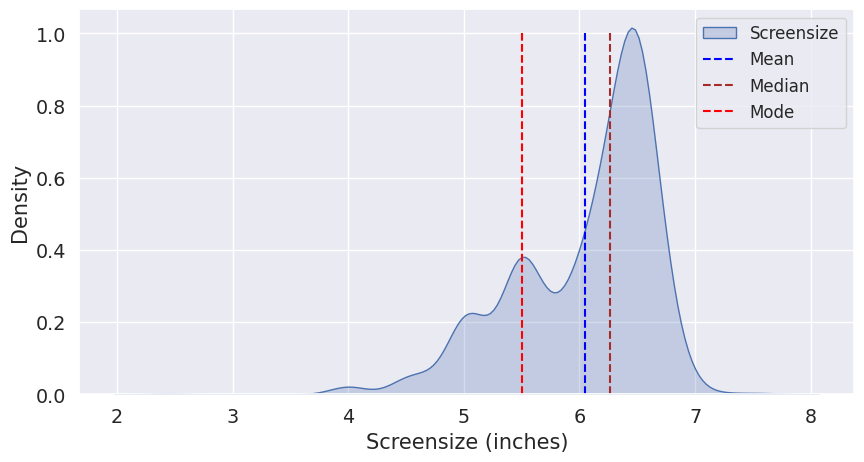

In [116]:
plt.figure(figsize=(10,5))
sns.kdeplot(screensize_arr, shade=True)
plt.vlines(x=np.mean(screensize_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(screensize_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(screensize_arr)[0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['Screensize', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Bisa dilihat bahwa distribusi bersifat `left skewed` karena distribusi data lebih berat di sebelah kanan dan memiliki ekor yang panjang di sebelah kiri. Dapat terlihat pula pada visualisasi data di atas, `median`, `mean`, `modus` tidak selalu sama. Pada kasus ini, median dapat menjadi pengukuran yang tepat untuk menggambarkan central tendency dari data karena distribusi data bersifat left skewed.

Untuk membandingkan distribusi data A ke data B, kita dapat menggunakan overlapping KDE plot.

Misal kita ingin membandingkan distribusi Screen Size pada Xiaomi dan Samsung.

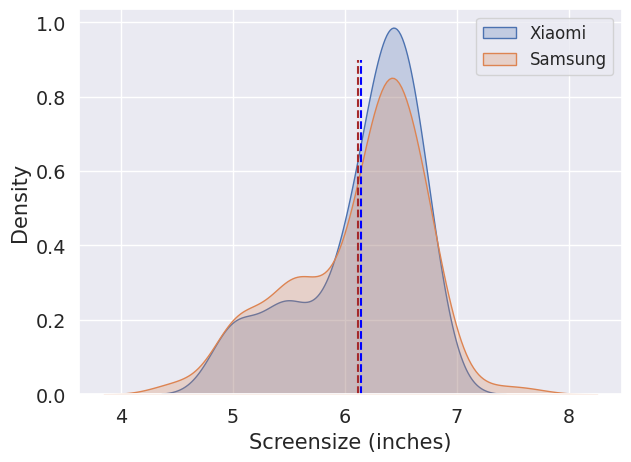

In [117]:
# KDE Plot
xiaomi = df[df['Brand'] == 'Xiaomi']
samsung = df[df['Brand'] == 'Samsung']
plt.figure(figsize=(7,5))
sns.kdeplot(xiaomi['Screensize (inches)'], shade=True)
sns.kdeplot(samsung['Screensize (inches)'], shade=True)
plt.legend(['Xiaomi','Samsung'], fontsize=12)
plt.vlines(x=xiaomi['Screensize (inches)'].mean(), ymin=0, ymax=0.9, color='blue', linestyle='--')
plt.vlines(x=samsung['Screensize (inches)'].mean(), ymin=0, ymax=0.9, color='brown', linestyle='--')
plt.show()

# Correlation

Korelasi dalam ranah *data science* merujuk pada hubungan statistik antara dua atau lebih variabel. Melalui korelasi, membantu kita memahami bagaimana perubahan dalam suatu variabel akan berkaitan dengan perubahan dalam variabel lainnya. Korelasi mengukur sejauh mana dua variabel bergerak bersamaan atau dependensi dalam suatu pola tertentu.

Dalam konteks korelasi, ada dua jenis korelasi yang umum digunakan:

* Korelasi Positif: Ketika dua variabel memiliki korelasi positif, artinya ketika satu variabel naik, yang lainnya juga cenderung naik, dan sebaliknya. Ini mengindikasikan adanya hubungan searah antara kedua variabel tersebut.

* Korelasi Negatif: Jika dua variabel memiliki korelasi negatif, artinya ketika satu variabel naik, yang lainnya cenderung turun, dan sebaliknya. Ini menunjukkan adanya hubungan terbalik atau lawan antara kedua variabel tersebut.

Korelasi dapat diukur dengan menggunakan koefisien korelasi, yang paling umum digunakan adalah dengan menghitung koefisien **korelasi Pearson**. Koefisien ini memiliki nilai antara -1 hingga 1:

* Nilai +1 menunjukkan korelasi positif sempurna, yaitu kedua variabel bergerak searah secara linier.
* Nilai -1 menunjukkan korelasi negatif sempurna, yaitu kedua variabel bergerak terbalik secara linier.
* Nilai 0 menunjukkan tidak ada korelasi linier antara kedua variabel tersebut.


Korelasi adalah alat penting dalam analisis data, karena membantu kita mengidentifikasi hubungan antara variabel, memprediksi perilaku data atau variabel, dan membuat keputusan yang lebih baik berdasarkan pemahaman tentang bagaimana variabel-variabel tersebut berkaitan antar satu sama lainnya. Namun, penting untuk diingat bahwa korelasi tidak selalu menunjukkan hubungan sebab-akibat, dan perlu berhati-hati dalam mengartikan hasil korelasi.



In [118]:
# Implementasi korelasi Pearson
df.corr(method='pearson')

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
Price,1.000000,0.279743,0.255461,0.276826,0.260423,0.659269,0.591847,0.014406,0.184664
Screensize (inches),0.279743,1.000000,0.725854,0.508298,0.531006,0.427751,0.602524,0.733120,0.389417
Camera_Nos,0.255461,0.725854,1.000000,0.546458,0.669166,0.416711,0.589898,0.632693,0.467579
Front Camera (MP),0.276826,0.508298,0.546458,1.000000,0.620479,0.387675,0.622373,0.331991,0.372598
Rear Camera (MP),0.260423,0.531006,0.669166,0.620479,1.000000,0.369280,0.622262,0.481070,0.522019
Memory (GB),0.659269,0.427751,0.416711,0.387675,0.369280,1.000000,0.709825,0.198526,0.257357
RAM (GB),0.591847,0.602524,0.589898,0.622373,0.622262,0.709825,1.000000,0.383067,0.437329
Battery (mAh),0.014406,0.733120,0.632693,0.331991,0.481070,0.198526,0.383067,1.000000,0.346563
Rating,0.184664,0.389417,0.467579,0.372598,0.522019,0.257357,0.437329,0.346563,1.000000


Dari perhitungan korelasi Pearson di atas, kita bisa menentukan pasangan atribut apa saja yang memiliki relasi yang tinggi. Untuk membuktikan, di bawah terdapat 2 scatterplot yang menunjukkan hubungan linear dengan `Camera_Nos`, yakni
* `Screensize (inches)`: 0.73
* `Rear Camera (MP)`: 0.67

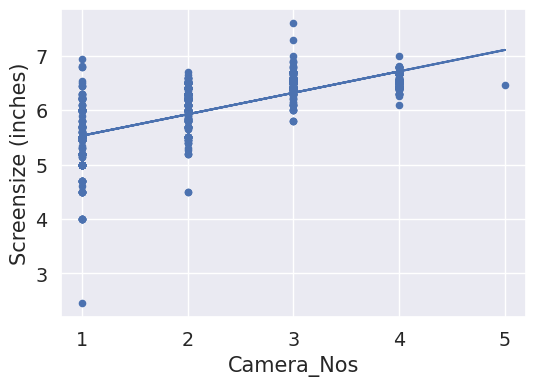

In [119]:
w = df["Camera_Nos"]
z = df["Screensize (inches)"]
df.plot.scatter(x="Camera_Nos", y="Screensize (inches)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

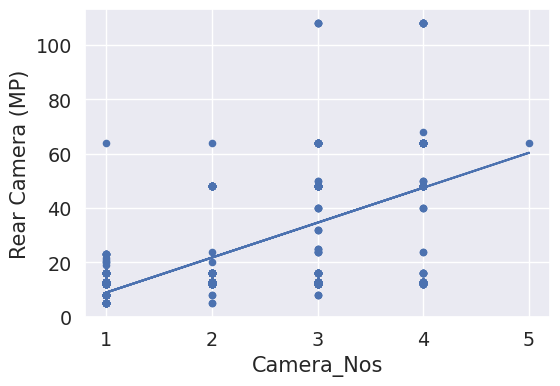

In [120]:
w = df["Camera_Nos"]
z = df["Rear Camera (MP)"]
df.plot.scatter(x="Camera_Nos", y="Rear Camera (MP)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

# Data Visualization

<Axes: xlabel='count', ylabel='Brand'>

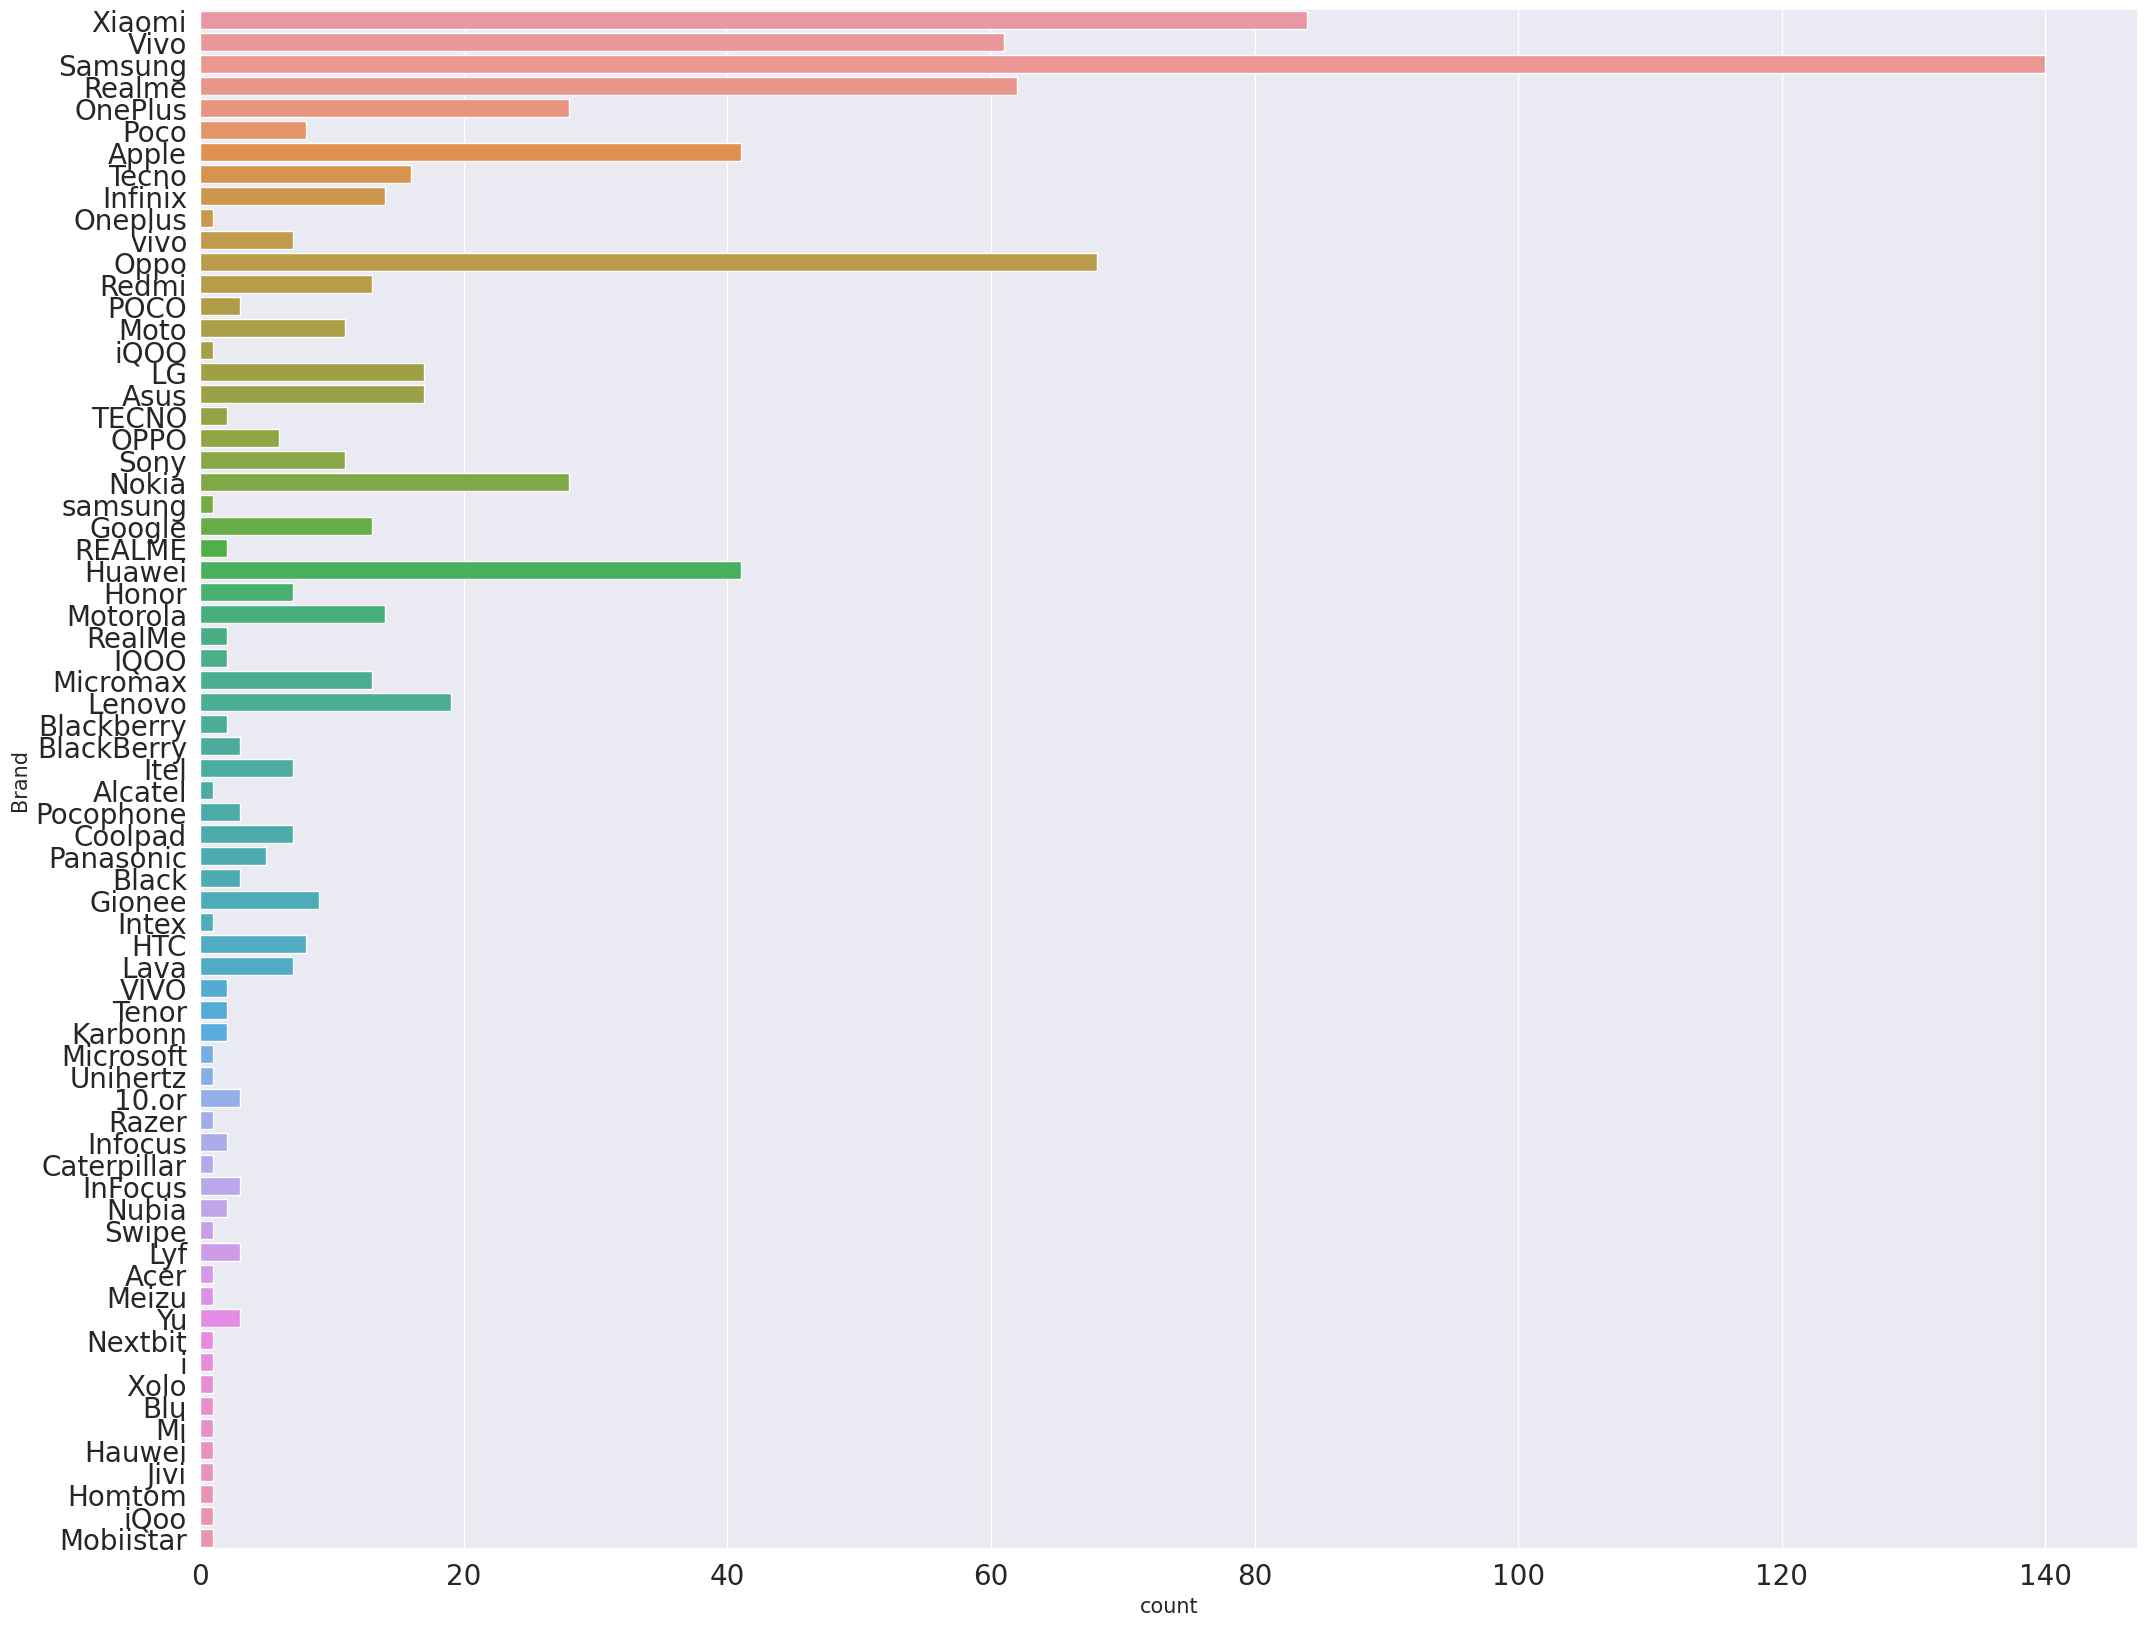

In [121]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

#to increase x ticks
plt.xticks(size=20)
# Fungsi yang membuat plot untuk melihat distribusi frekuensi untuk satu kolom/atribut
sns.countplot(y='Brand', data=df)

Bisa kita lihat pada countplot di atas bahwa Samsung merupakan brand smartphone yang memiliki tipe terbanyak. Berikut merupakan contoh jika kita ingin mendapatkan visualisasi data yang telah diurutkan dari yang paling besar hingga terkecil berdasarkan nilai yang dimilikinya.

<Axes: xlabel='count', ylabel='Brand'>

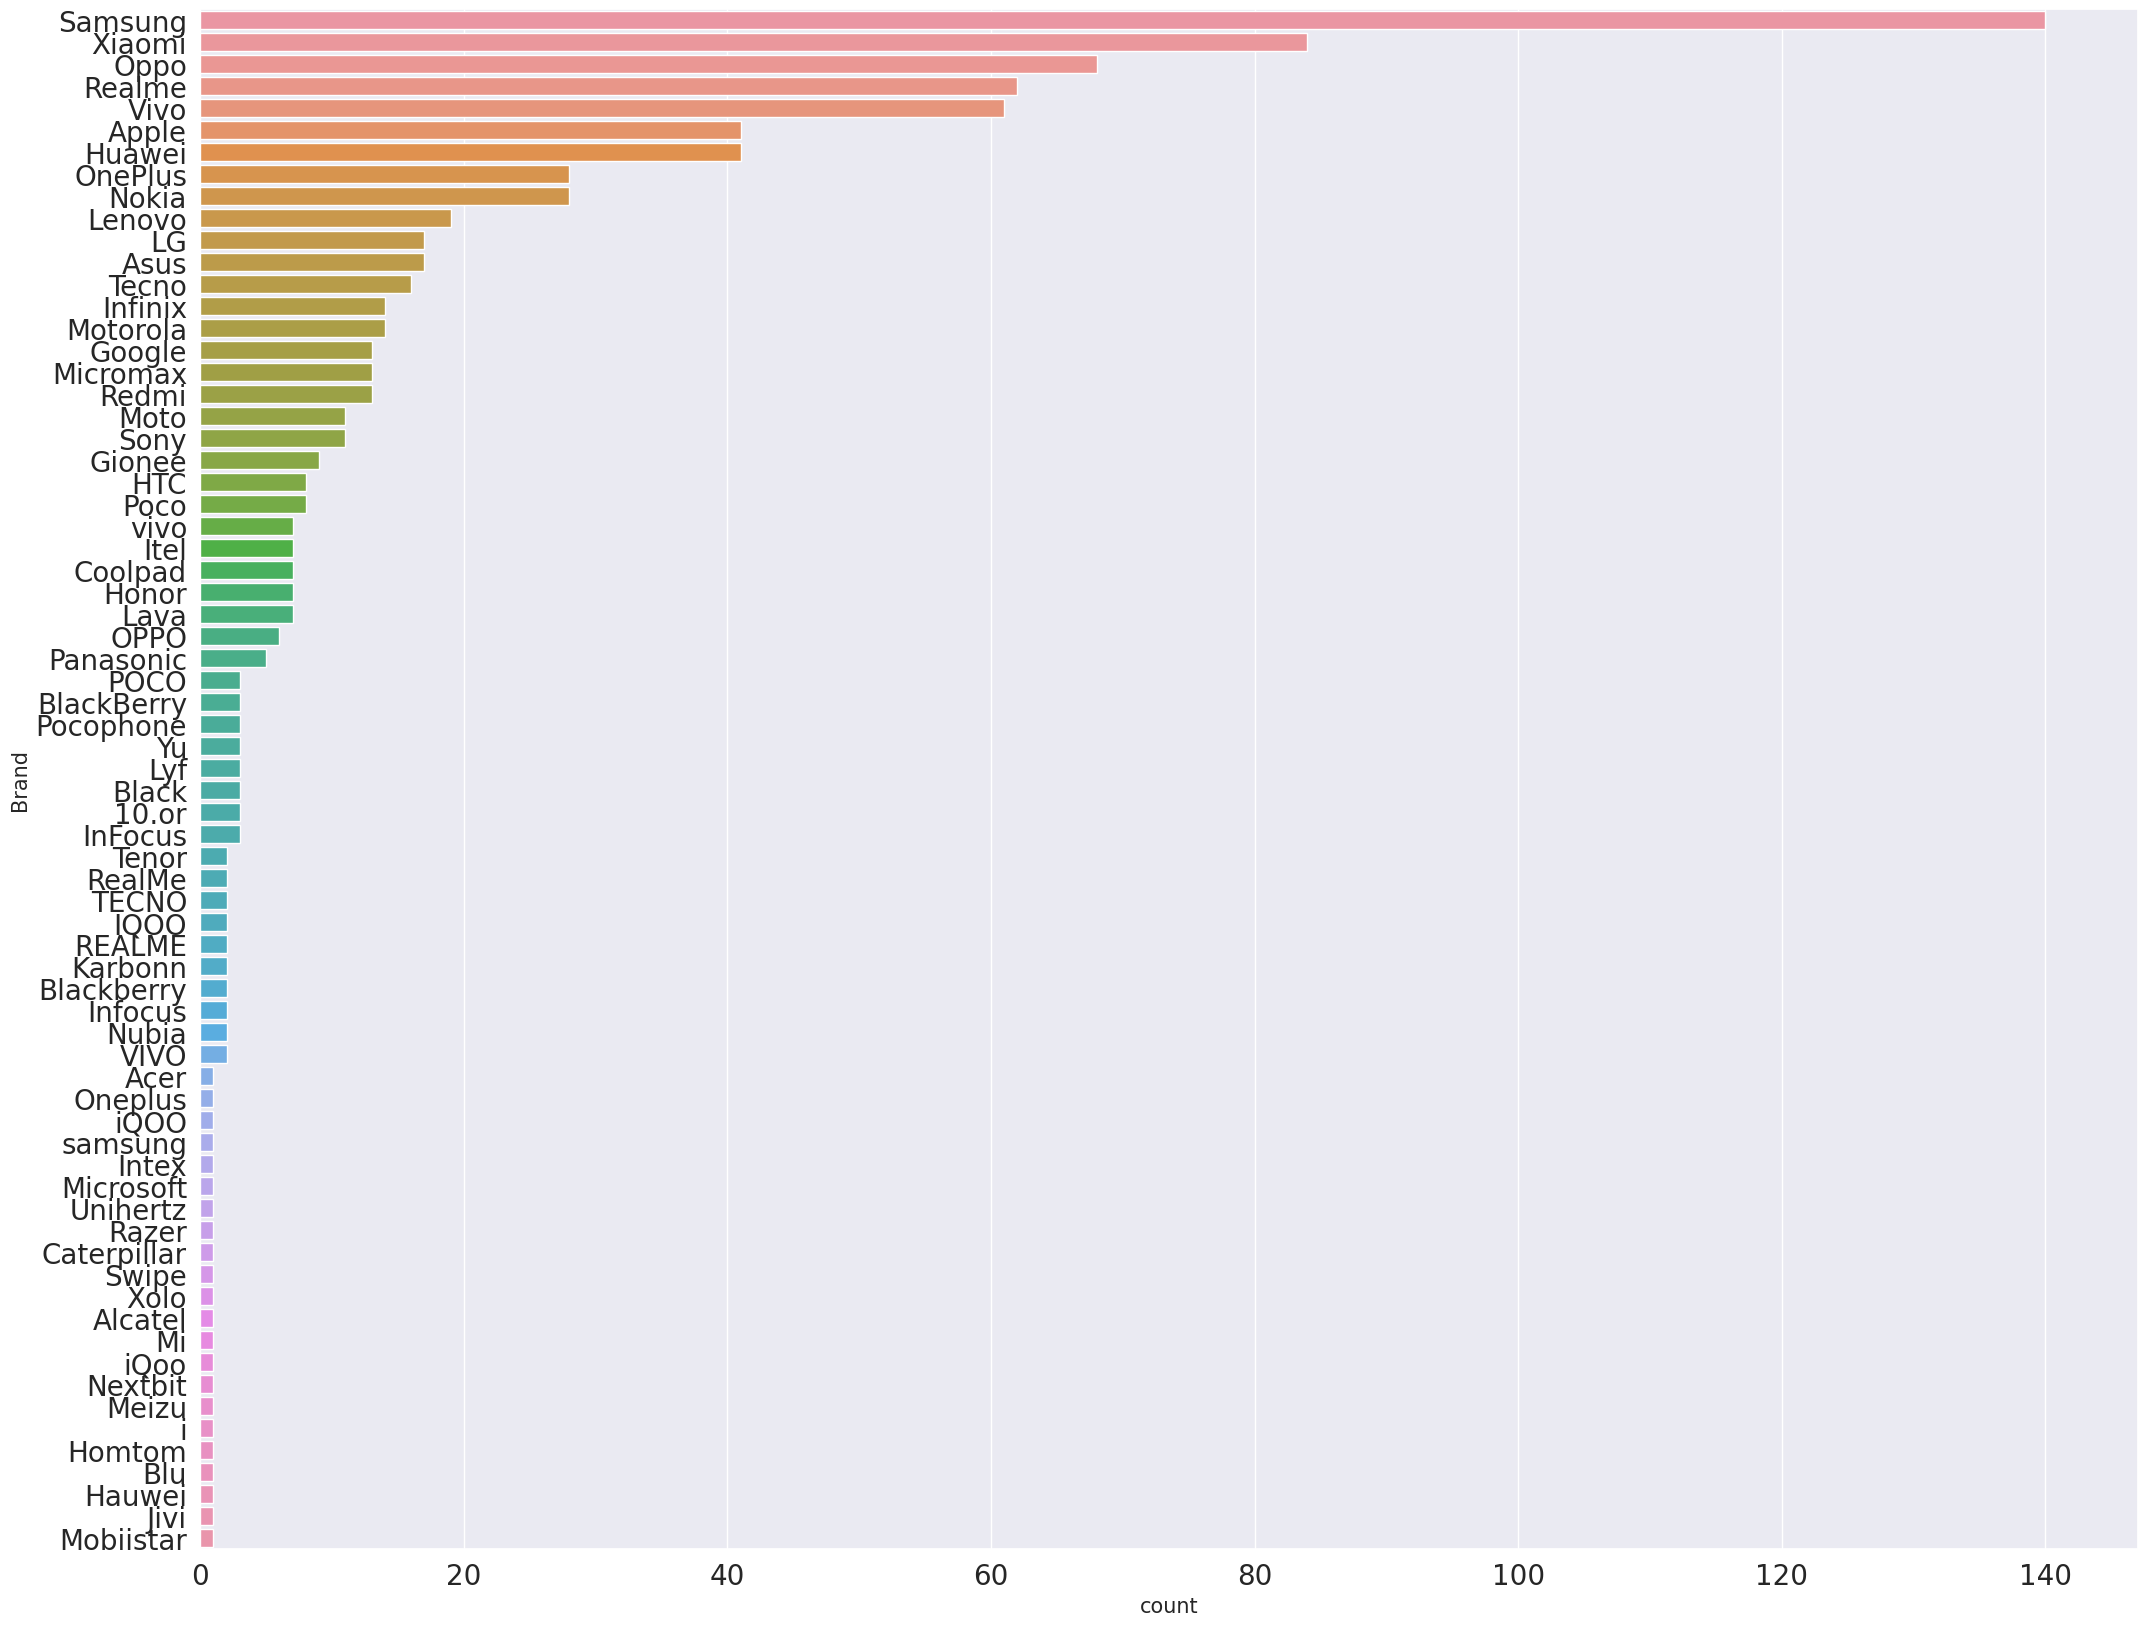

In [122]:
# Calculate the counts of each brand and sort them in descending order
brand_counts = df['Brand'].value_counts().sort_values(ascending=False)

# Create a countplot with sorted order
plt.figure(figsize=(25, 20))
plt.yticks(size=20)
plt.xticks(size=20)
sns.countplot(y='Brand', data=df, order=brand_counts.index)

<Axes: xlabel='count', ylabel='Memory (GB)'>

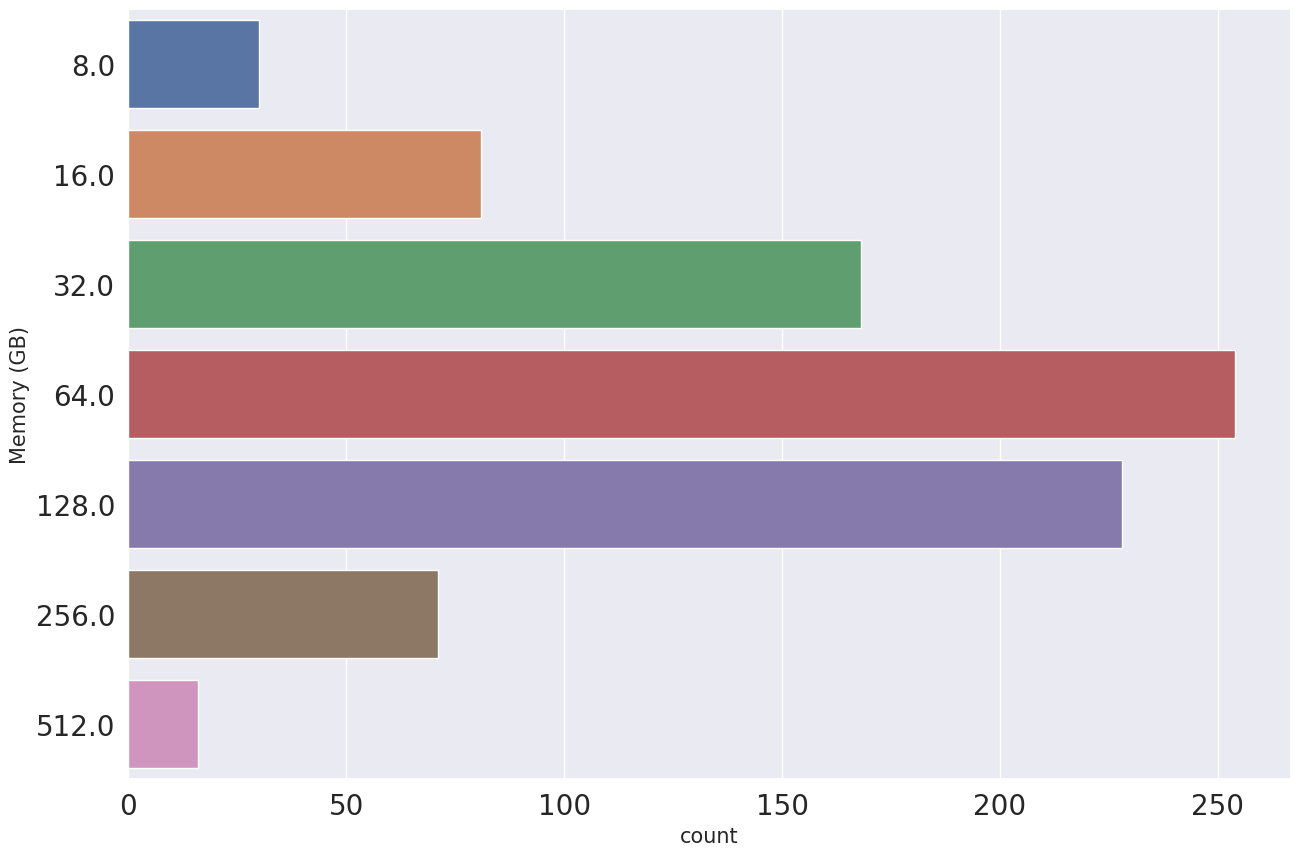

In [123]:
plt.figure(figsize=(15,10))
plt.yticks(size=20)

#to increase x ticks
plt.xticks(size=20)
sns.countplot(y='Memory (GB)', data=df)

Dari countplot, dapat terlihat bahwa jumlah penyimpanan *smartphone* paling banyak adalah sebesar 64 GB dan 512 GB jumlah penyimpanan paling sedikit

<Axes: xlabel='Brand', ylabel='RAM (GB)'>

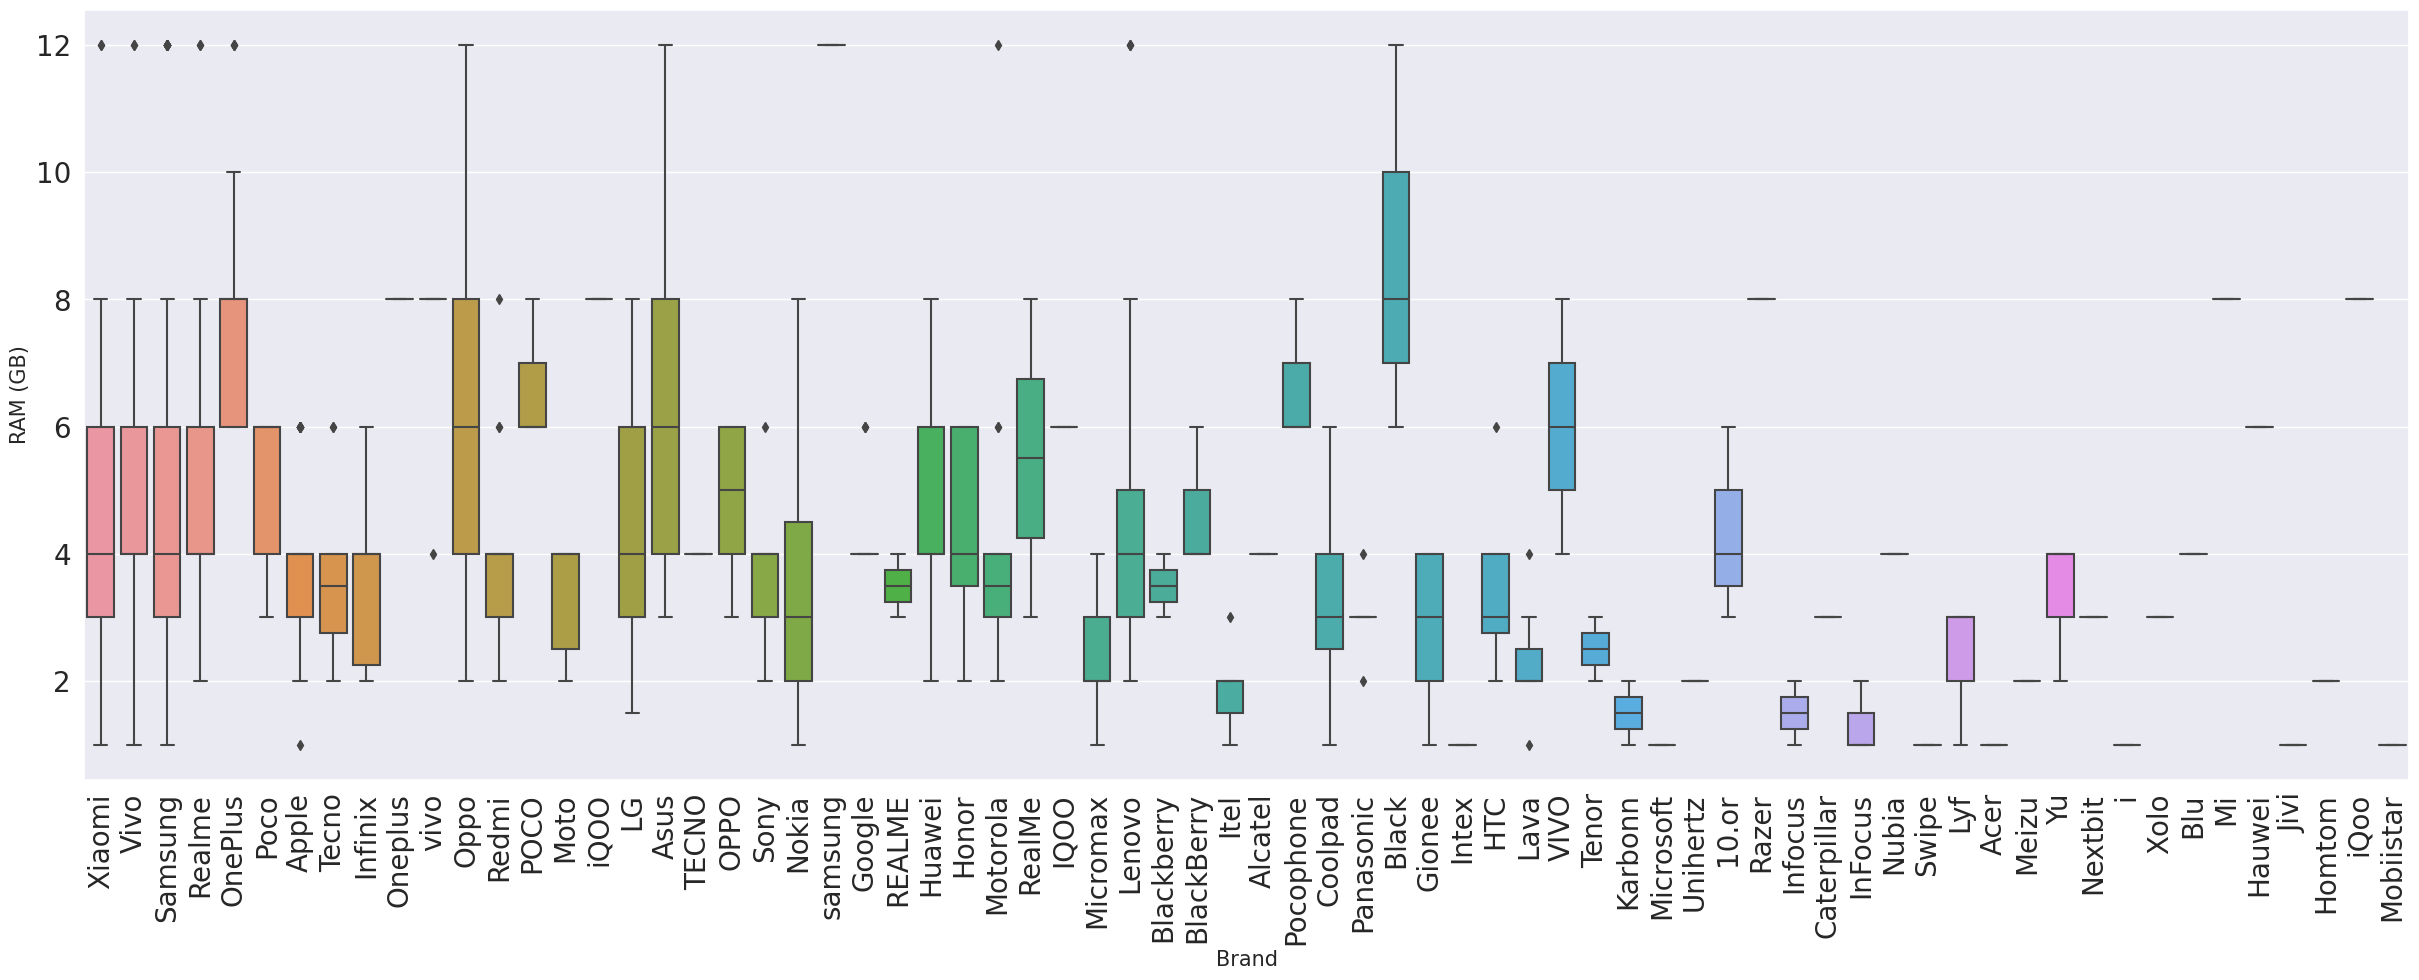

In [124]:
# Menampilkan boxplot Make terhadap RAM (GB)
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='Brand', y='RAM (GB)')

# Latihan Soal

### **SOAL 1: Descriptive Statistics**

(a) Tampilkan descriptive statistics dari atribut <font color='red'>**Memory (GB)**</font>! (hint: harap tambahkan range, Q1, Q2, Q3) ***[revised]***

In [125]:
# Jawab

memory_arr = df['Memory (GB)']

"""
Descriptive Statistic:
1. Central tendency (mean, median, mode)
2. Dispersion atau variability (variance, standard deviation)
3. Minimum, maximum
4. Range
4. Quantile
5. Percentile (karena tidak ada dispecify, maka hanya sampai nomor 4 karena quantile juga termasuk persentase (25 (Q1), 50 (Q2), 75(Q3)))
"""

stats = [
    ['Mean', np.mean(memory_arr)],
    ['Median', np.median(memory_arr)],
    ['Mode', scp.mode(memory_arr)[0]],
    ['Standard Deviation', np.std(memory_arr)],
    ['Variance', np.var(memory_arr)],
    ['Minimum', np.min(memory_arr)],
    ['Maximum', np.max(memory_arr)],
    ["Range", np.max(memory_arr) - np.min(memory_arr) ],
    ["Lower Quantile (Q1)", np.percentile(memory_arr, 25) ],
    ["Middle Quantile (Q2)", np.percentile(memory_arr, 50) ],
    ["Upper Quantile (Q3)", np.percentile(memory_arr, 75) ],
]

pd.DataFrame(stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,92.830189
1,Median,64.000000
2,Mode,64.000000
3,Standard Deviation,87.620480
4,Variance,7677.348523
5,Minimum,8.000000
6,Maximum,512.000000
7,Range,504.000000
8,Lower Quantile (Q1),32.000000
9,Middle Quantile (Q2),64.000000


(b) Apa central tendency paling cocok untuk atribut <font color='red'>**Memory (GB)**</font>? Berikan alasan! ***[revised]***
> Indented block



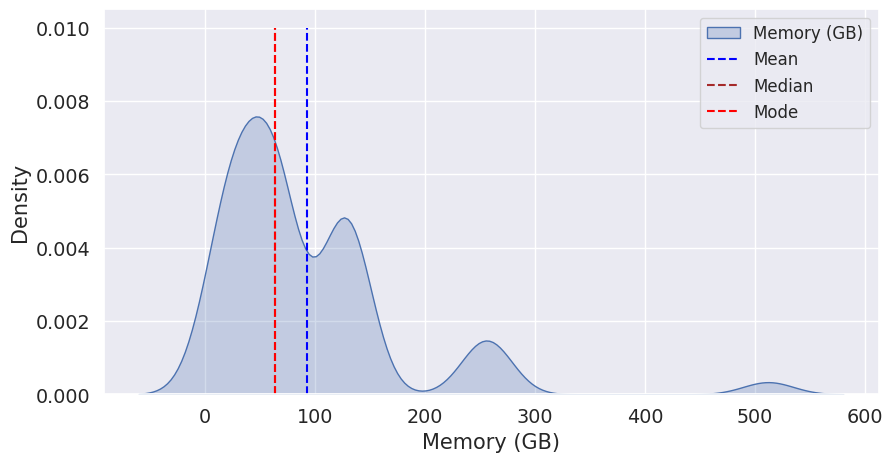


Berdasarkan grafik plot yang dapat dibuat melalui nilai dari memory, kita dapat menvisualisasikan graf berbentuk positive skewed (right skewed) maka 
median menjadi central tendency yang paling cocok untuk attribute screensize ini.

Hal ini karena median memiliki ciri-ciri seperti:
 1. Robustness to Outliers: median kurang senitif terhadap outliner dibandingkan central tendency yang lain.
 2. Reflects the Central Value: median merepresentasikan nilai tengah dari suatu dataset.
 3. Intepretable: mudah diintepretasi pertengahan dari data.

Berikut adalah alasan-alasan yang mendukung median sebagai central tendecy yang paling cocok untuk attribute Memory (inches)


In [126]:
# Jawab
plt.figure(figsize=(10,5))
sns.kdeplot(memory_arr, shade=True)
plt.vlines(x=np.mean(memory_arr), ymin=0, ymax=0.01, color='blue', linestyle='--')
plt.vlines(x=np.median(memory_arr), ymin=0, ymax=0.01, color='brown', linestyle='--')
plt.vlines(x=scp.mode(memory_arr)[0], ymin=0, ymax=0.01, color='red', linestyle='--')
plt.legend(['Memory (GB)', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

print("\nBerdasarkan grafik plot yang dapat dibuat melalui nilai dari memory, kita dapat menvisualisasikan graf berbentuk positive skewed (right skewed) maka \nmedian menjadi central tendency yang paling cocok untuk attribute screensize ini.\n\nHal ini karena median memiliki ciri-ciri seperti:\n 1. Robustness to Outliers: median kurang senitif terhadap outliner dibandingkan central tendency yang lain.\n 2. Reflects the Central Value: median merepresentasikan nilai tengah dari suatu dataset.\n 3. Intepretable: mudah diintepretasi pertengahan dari data.\n\nBerikut adalah alasan-alasan yang mendukung median sebagai central tendecy yang paling cocok untuk attribute Memory (inches)")

Info: Garis dari **Median tidak terlihat** karena tertutup terhadap garis mode.

(c) Buatlah heatmap dari korelasi Pearson pada dataset `SmartphoneSpecs.csv` dan berikan analisis Anda terhadap heatmap tersebut!

<Axes: >

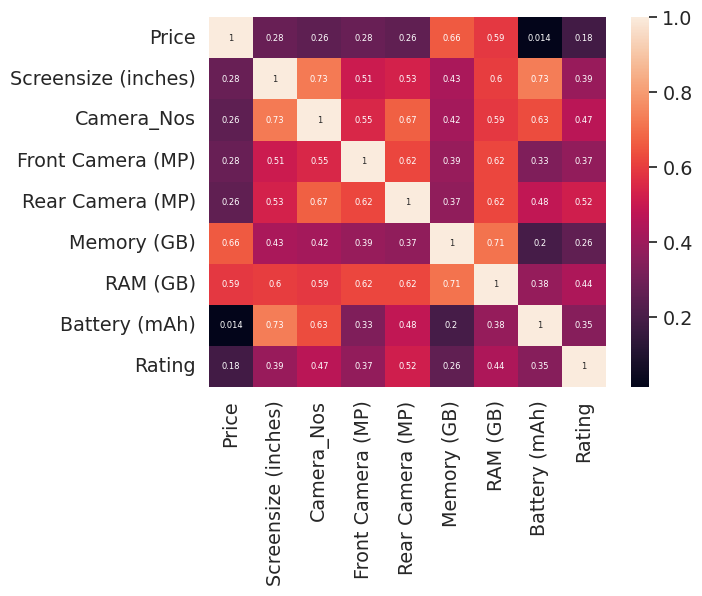

In [127]:
# Jawab

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True, annot_kws={"fontsize":6})

Analisis saya terhadap heatmap tersebut adalah:
- Hubungan Camera_NOS dengan Screensize (Inches) yang berarti bahwa korelasi kedua variable positif, yang berarti apabila Camera_Nos bertambah maka Screensize (inches) **cenderung** akan bertambah. Hal ini berarti bahwa kedua attribute tersebut memiliki *linear relationship* (hubungan searah).
- Sehingga dari korelasi diatas, kita juga dapat melihat bahwa terdaoat value seperti battery dengan harga. Artinya apabila baterry memiliki mAh yang besar maka **cenderung** harga *smartphone* tidak berubah.

Dapat dilihat dari 2 sampel diatas bahwa heatmap ini melambangkan korelasi antara 2 atribut yang ada dalam data. Apabila nilai antara 2 atribut mendekati 1 maka cenderung adanya hubungan yang searah (berarti apabila 1 atribut bertambah nilainya, atribut yang lain juga akan ikut bertambah nilainya). Sedangkan apabila nilai antara 2 atribut mendekati 0 maka **cenderung** tidak ada hubungan searah antara kedua atribut tersebut.

Oleh karena itu, heatmap diatas menggambarkan relasi antara beberapa komponen dari suatu smartphone. Seperti untuk screensize yang bertambah maka harganya juga cenderung lebih bertambah (0.73), dsb.

### **SOAL 2: Data Visualization**

Untuk menjawab soal-soal berikut, pilihlah salah satu dari visualisasi di bawah ini yang merupakan visualisasi yang tepat untuk menjawab pertanyaan tersebut:
* Pie chart
* Bar chart
* Scatter plot
* Box plot
* Histogram
* KDE Plot

Pada beberapa kasus terkadang memiliki lebih dari satu "jawaban yang tepat", karena ada banyak cara untuk visualisasi data. Pilihlah yang menurut Anda paling cocok berdasarkan kasus yang diberikan pada soal tersebut.

**Harap tuliskan secara eksplisit chart apa yang Anda pilih beserta alasannya.**

(a) Buatlah visualisasi untuk melihat jumlah rata-rata ukuran Megapiksel dari kamera belakang yang dimiliki dari setiap merk *smartphone*. Apakah merek Sony memiliki ukuran Megapiksel dari kamera belakang terbesar?

 **Jawaban:**

**!!! PENTING !!!**

 Asumsi: untuk **2 merk smartphone dianggap case insensitive**, contoh: apabila ada brand samsung atau Samsung, maka dianggap sama.

 Chart yang saya gunakan adalah **Horizontal Bar Chart**. Hal ini karena kita ingin **memperlihatkan perbandingan** data antara rata-rata ukuran megapiksel kamera belakang setiap merk smartphone. Barchart biasa gunakan untuk merepresentasikan data yang memiliki kategori dan numerik. Dalam kasus ini, kategori merupakan merk smartphone dan numerik merupakan rata=rata megapiksel kamera belakang merk smartphone tersebut. Perlu diingat juga bahwa barchart berguna dalam memperlihatkan perbandingan antara beberapa variabel.

 Saya memilih **horizontal** karena merk smartphone yang panjang dapat menyebabkan overlap dengan nama merk smartphone yang lain apabila barchart yang digunakan vertical.

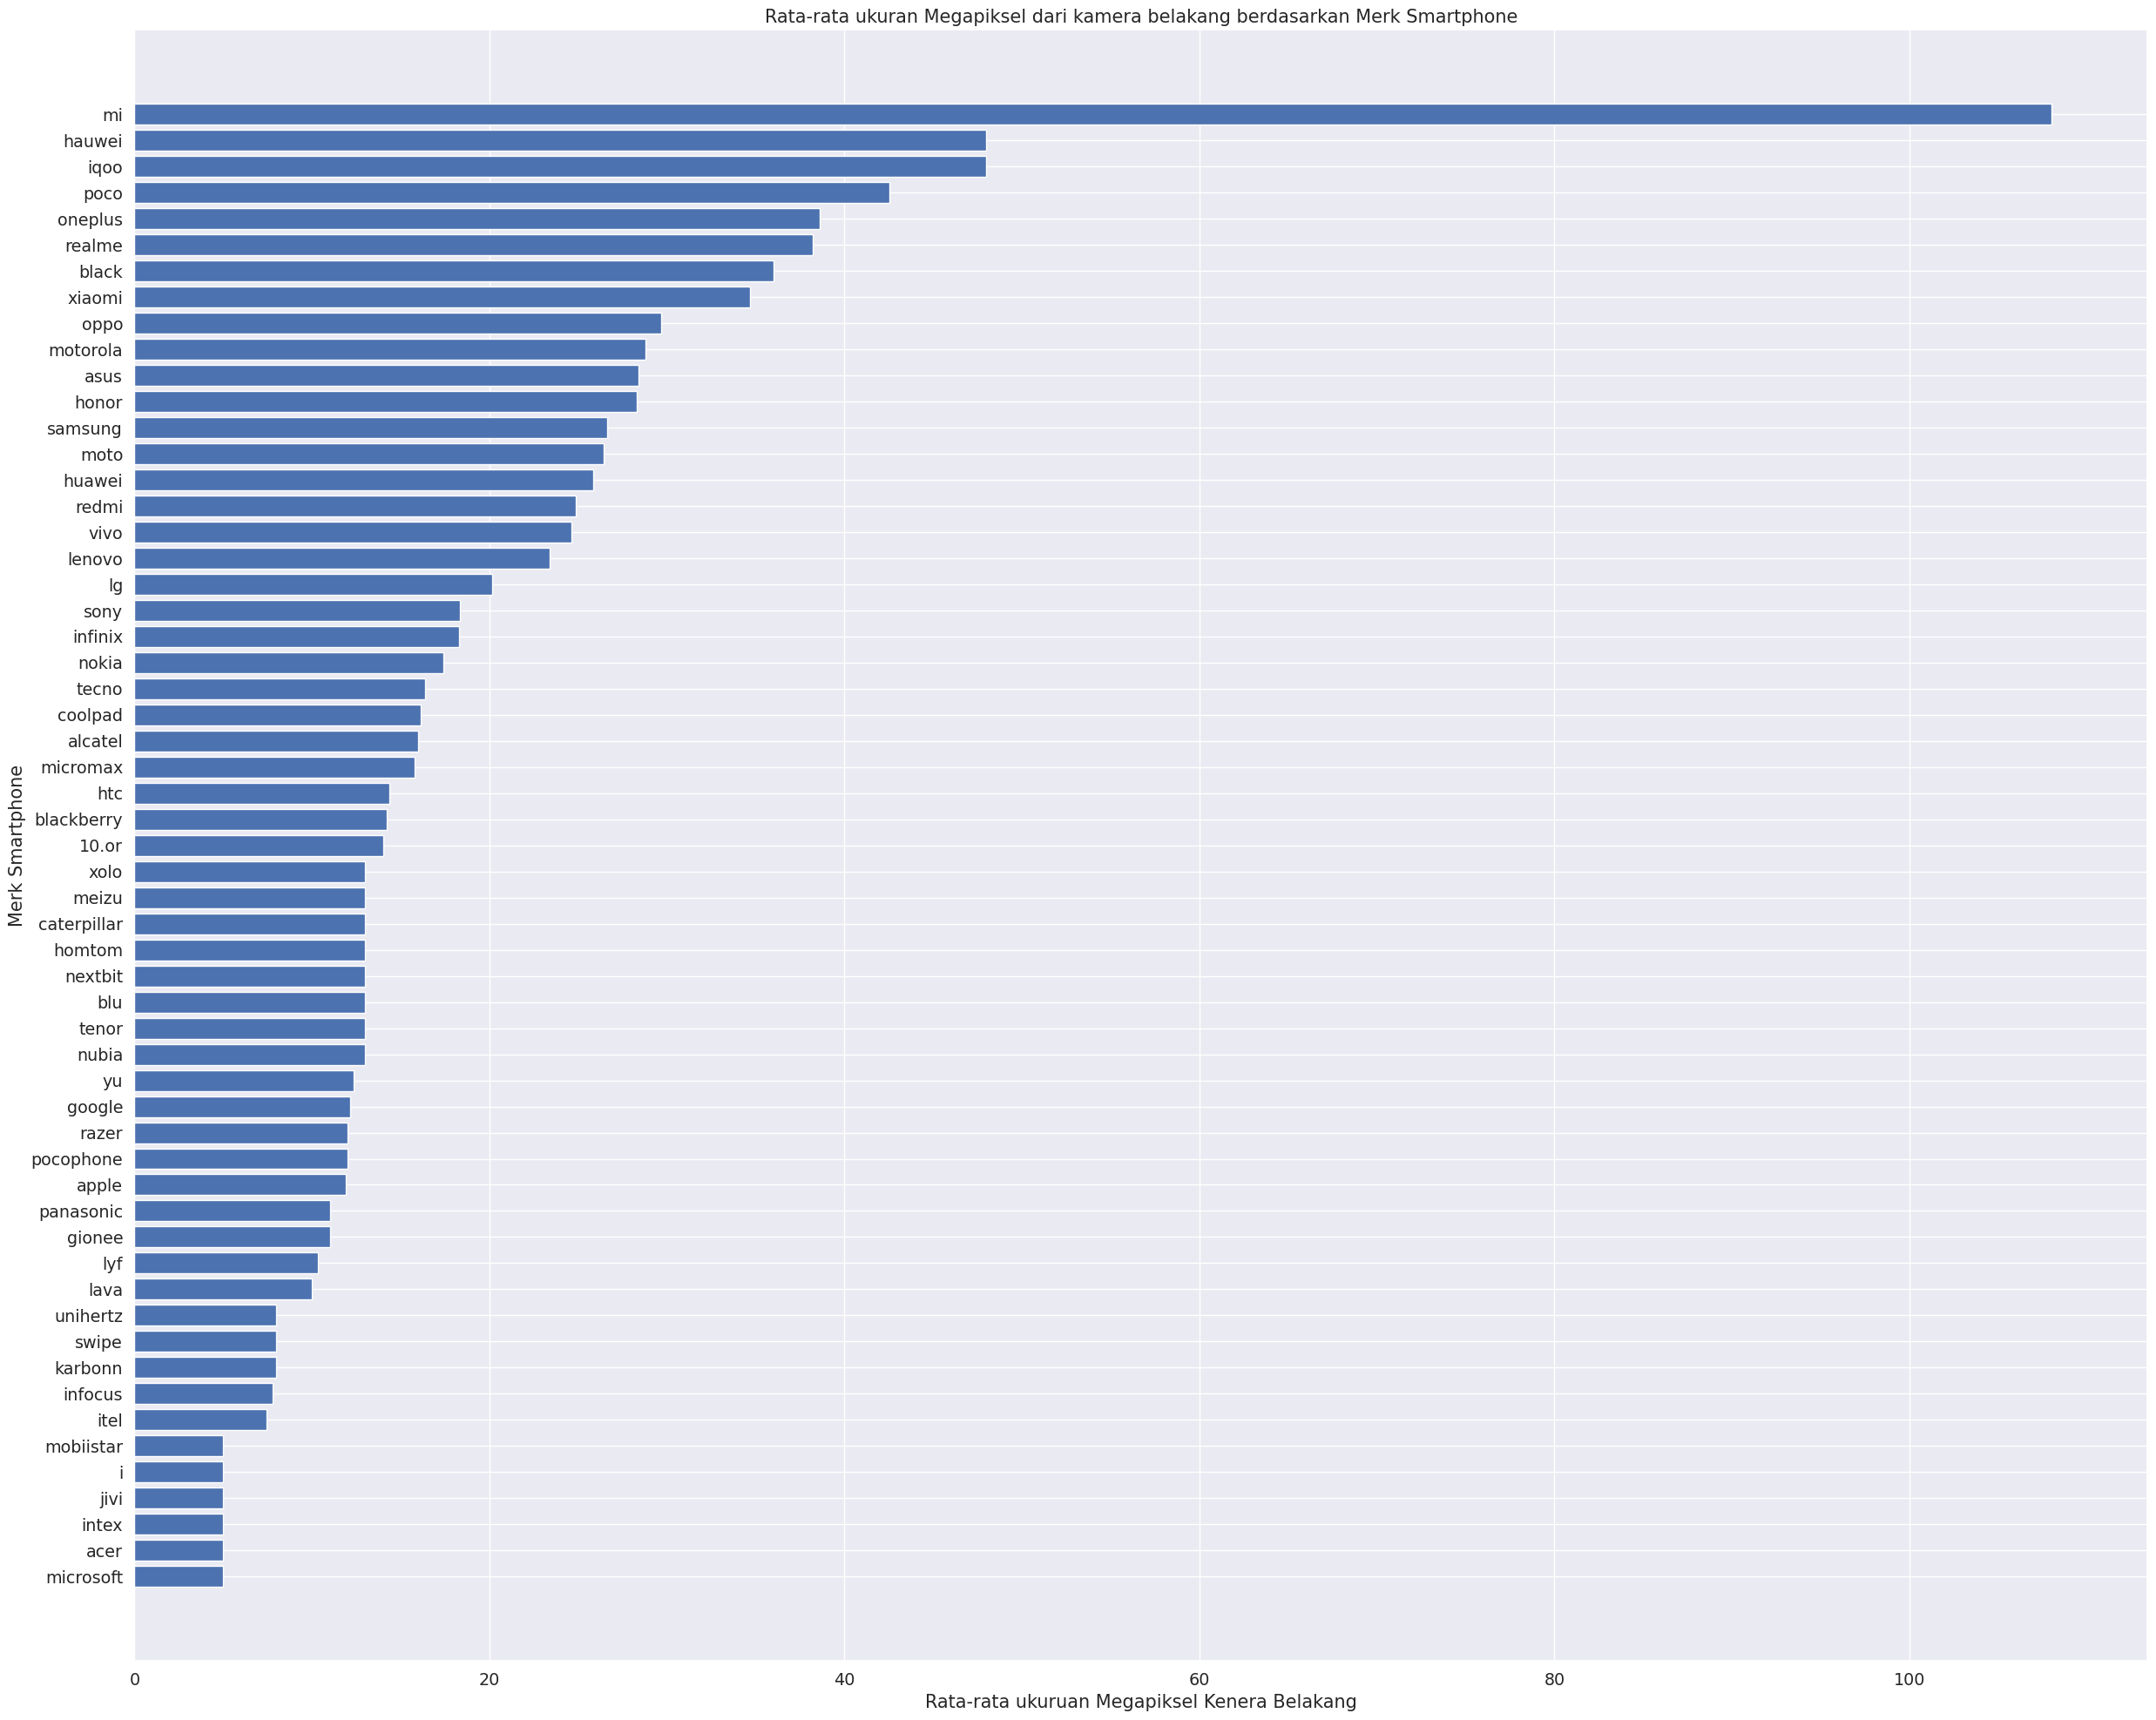

In [128]:
# Jawab

# -----------------------------------------------------------------------------------------------------------------------------------------
""" Asumsi: untuk merk smartphone dianggap case insensitive, contoh: apabila ada brand samsung atau Samsung, maka dianggap sama."""
# -----------------------------------------------------------------------------------------------------------------------------------------

brands = df.groupby(df['Brand'].str.lower())["Rear Camera (MP)"].mean().sort_values(ascending=True)

plt.figure(figsize=(25, 20))
plt.barh(brands.index, brands.values)
plt.ylabel('Merk Smartphone')
plt.xlabel('Rata-rata ukuruan Megapiksel Kenera Belakang')
plt.title('Rata-rata ukuran Megapiksel dari kamera belakang berdasarkan Merk Smartphone')

plt.tight_layout()
plt.show()


Tidak. Berdasarkan visualiasi dibawah menggunakan **Horizontal Bar Chart**, kita dapat melihat bahwa merek **Sony tidak memiliki ukuran megapiksel terbesar** untuk kamera belakang. Merek smartphone yang **memiliki megapiksel terbesar pada kamera belakangnya adalah Mi**.

(b) Buatlah visualisasi data persentase *smartphone* yang memiliki ukuran RAM yang lebih dari 6 GB. Dari hasil visualisasi tersebut berapakah persentase dari smartphone dengan nilai rating 3 dan memiliki RAM yang lebih dari 6 GB?

Chart yang saya pilih ialah **PIE CHART** karena chart tersebut cocok untuk menampilkan persentase suatu data.

Persentase smartphone dengan rating 3 diantara dengan smartphone yang memiliki RAM > 6GB adalah **12%**.

36.0


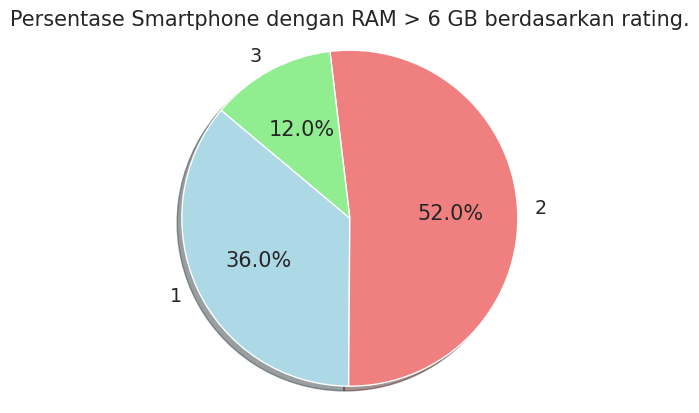


Persentase smartphone dengan rating 3 diantara smartphone dengan RAM > 6GB adalah 12.00%.


In [129]:
# Jawab

new_df = df[df["RAM (GB)"] > 6]

total_filtered = len(new_df)

rating_1 = (len(new_df[new_df["Rating"] == 1])*100)/total_filtered
rating_2 = (len(new_df[new_df["Rating"] == 2])*100)/total_filtered
rating_3 = (len(new_df[new_df["Rating"] == 3])*100)/total_filtered

print(rating_1)
labels = ['1', '2', '3']
sizes = [rating_1, rating_2, rating_3]
colors = ['lightblue', 'lightcoral', 'lightgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Persentase Smartphone dengan RAM > 6 GB berdasarkan rating.')
plt.axis('equal')

plt.show()

print(f'\nPersentase smartphone dengan rating 3 diantara smartphone dengan RAM > 6GB adalah {rating_3:.2f}%.')

(c) Buatlah visualisasi untuk melihat apakah terdapat outliers di atribut `Camera_Nos` untuk setiap besaran RAM. Berikan satu contoh RAM yang terlihat memiliki outlier.

Saya menggunakan **boxplot** karena mudah melihat outlier (outlier berada di atas RUB atau di bawah RLB).

**Contoh dapat dilihat dibawah visualisasi data.**

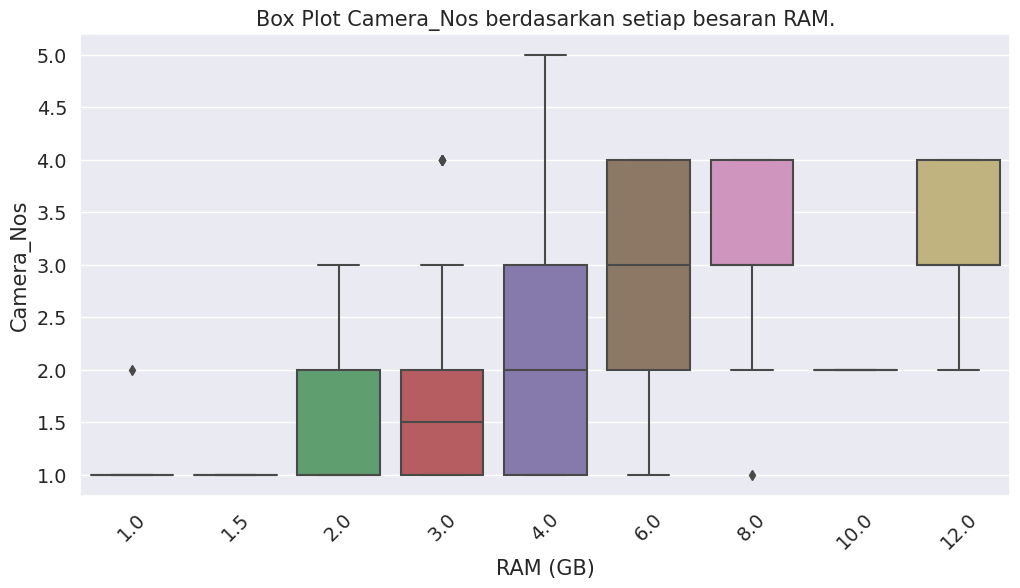


Salah satu contoh RAM yang terlihat memiliki outlier adalah RAM sebesar 1GB. 

Berikut adalah satu contoh record yang menyebabkan outlier tersebut yaitu smartphone Itel A44 Power dan Camera_Nos sebesar 2.



Brand                            Itel
Phone                  Itel A44 Power
Price                            4699
Screensize (inches)              5.45
Camera_Nos                          2
Front Camera (MP)                 2.0
Rear Camera (MP)                  5.0
Memory (GB)                       8.0
RAM (GB)                          1.0
Battery (mAh)                  4000.0
Rating                              1
Name: 686, dtype: object

In [130]:
# Jawab

plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title('Box Plot Camera_Nos berdasarkan setiap besaran RAM.')
sns.boxplot(x='RAM (GB)', y='Camera_Nos', data=df)
plt.xlabel('RAM (GB)')
plt.ylabel('Camera_Nos')
plt.show()

case_example = df[(df["RAM (GB)"] == 1) & (df["Camera_Nos"] == 2)].iloc[0]

print(f"\nSalah satu contoh RAM yang terlihat memiliki outlier adalah RAM sebesar 1GB. \n\nBerikut adalah satu contoh record yang menyebabkan outlier tersebut yaitu smartphone {case_example.Phone} dan Camera_Nos sebesar {case_example.Camera_Nos}.\n")
case_example

(d) Buatlah visualisasi untuk melihat pola atau pattern antara Battery (mAh) dan Screensize (inches). **Menurut Anda, apa hubungan yang dimiliki antara Battery dan Screensize ? Jelaskan!**

Saya menggunakan **scatter plot** untuk melakukan visualisasi pola atau pattern antara battery dan screensize. Hal ini saya lakukan untuk menganalisis korelasi (keterhubungan) antara kedua variabel tersebut. Oleh karena itu, karena berhubungan keterhubungan/korelasi maka scatter plot merupakan salah satu visualisasi yang cocok.  

**Analisis dapat dilihat dibawah visualisasi data!**

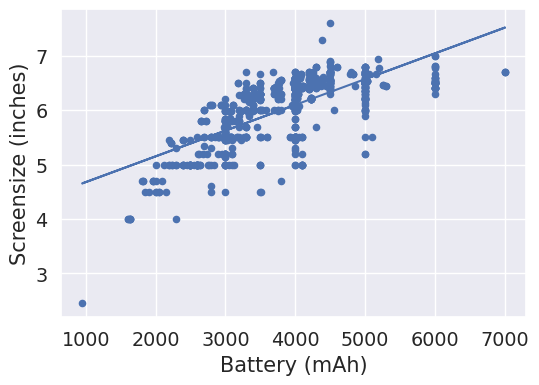


Korelasi: 0.7331199764560724



In [131]:
# Jawab

w = df['Battery (mAh)']
z = df['Screensize (inches)']

df.plot.scatter(x="Battery (mAh)", y="Screensize (inches)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

print(f"\nKorelasi: {df.corr()['Battery (mAh)']['Screensize (inches)']}\n")

Berdasarkan Scatter Plot diatas, dapat dilihat bahwa untuk battery yang semakin bertambah, nilai dari screensize cenderung juga bertambah. Hal ini menandakan bahwa terdapat **positive correlation**(korelasi positif) dimana berarti apabila 1 variabel bertambah maka 1 variabel yang lain juga cenderung bertambah.

Kita juga dapat melihat bahwa *data points* yang terdapat pada scatter plot berada dekat pada garis lurus. Hal ini menandakan bahwa hubungan antara 2 variabel battery dan screensize memiliki hubungan searah antara satu sama lain.

Oleh karena itu, menurut saya, hubungan battery dan screensize adalah hubungan yang searah, dimana semakin bertambahnya battery maka screensize juga cenderung semakin bertambah.

Hal ini juga dapat dibuktikan dari nilai koefisien dari **correlation** yang kita temukan yaitu 0.7331199764560724

Seperti yang diketahui bahwa nilai koefisien dari correlation berada pada interval [-1, +1]. Oleh karena itu, karena 0.73 merupakan nilai koefisien **correlation** yang tentu saja memiliki hubungan *positive correlation* yang kuat.

(e) Visualisasikan distribusi data `Memory (GB)` pada Samsung dan Infinix. Berikan analisis Anda!

Saya memilih **Barchart** untuk membandingkan distribusi 2 data. Hal ini karena Bar Chart dapat memberikan tampilan perbandingan antara kedua distribusi antara kedua merek smartphone tersebut. Alternatif yang sebelumnya saya gunakan adalah KDE Plot namun distribusi KDE plot memiliki distribusi data yang negatif pada sisi memory (GB). Oleh karena itu saya memutuskan untuk menggunakan **Bar Chart** karena ada pembagian kategori antara Samsung dan Infinix.

**Analisis dapat dilihat dibawah visualisasi data!**



<Axes: xlabel='Memory (GB)'>

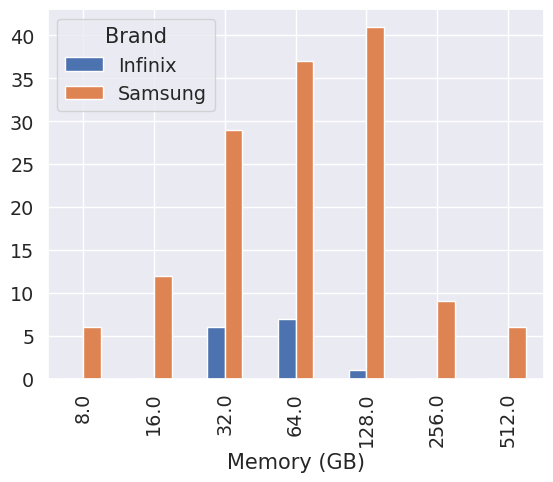

In [132]:
# Jawab

smartphone_samsung_infinix = df[df['Brand'].isin(["Samsung", "Infinix"])]

grouped_df = smartphone_samsung_infinix.groupby(['Brand', 'Memory (GB)']).size().reset_index(name='counts')

pivoted = grouped_df.pivot(index='Memory (GB)', columns='Brand', values='counts')

# Plot the bar chart
pivoted.plot.bar()

Berdasarkan **Bar Chart** diatas, analisis yang saya peroleh adalah sebagai berikut:
- Peredaran untuk smartphone merek Infinix lebih tersebar pada memory 32, 64 dan 128 GB sedangkan peredaran smartphone merek Samsung memiliki banyak variasi memory pada penjualan smartphone mereka.
- Samsung memiliki penjualan smartphone yang lebih banyak dipasaran. Di lain sisi, Infinix memiliki penjualan smartphone yang jauh lebih sedikit dibandingkan Samsung. Akan tetapi, kita tidak dapat menyimpulkan apakah merek smartphone infinix menjual smartphone diluar dari memory 32, 64, dan 128 GB karena masih belum terdapat datanya.

Oleh karena itu, kita dapat berasumsi bahwa Samsung merupakan merek smartphone yang memiliki customer yang banyak dan menyediakan banyak variasi memory dipasaran sedangkan Infinix memiliki lebih sedikit customer dan variasi yang lebih sedikit (**asumsi bahwa infinix tidak menjual smartphone dengan memory diluar 32, 64, 128**)

(f) Buatlah visualisasi untuk menentukan merek *smartphone* yang memiliki kapasitas penyimpanan kurang dari 64 GB dan memiliki rating 1 dengan harga rata-rata terendah (paling murah). Apa yang membuat produk pada merek *smartphone* tersebut memiliki harga termurah? `hint: Gunakan Descriptive Statistics`

Saya memilih **Horizontal Bar Chart** sebagai visualisasi saya. Hal ini saya lakukan karena kita ingin melihat merek *smartphone* yang memiliki harga rata-rata terendah (termurah), dengan kata lain ingin membandingkan harga rata-rata untuk merek smartphone yang ada. Oleh karena itu, karena kita ingin memperlihatkan perbandingan dan sesuai fungsi bar chart yaitu **menyajikan perbandingan data pada satu atau beberapa seri data/komponen**, membuat chart yang cocok digunakan untuk kasus ini adalah bar chart.

Pemilihan arah barchart, saya lakukan karena merek smartphone yang "**bisa saja**" panjang dan dapat menyebabkan overlap antara merek smartphone lain. Oleh karena itu saya gunakan **Horizontal Barchart** karena lebih protektif terhadap hal tersebut.

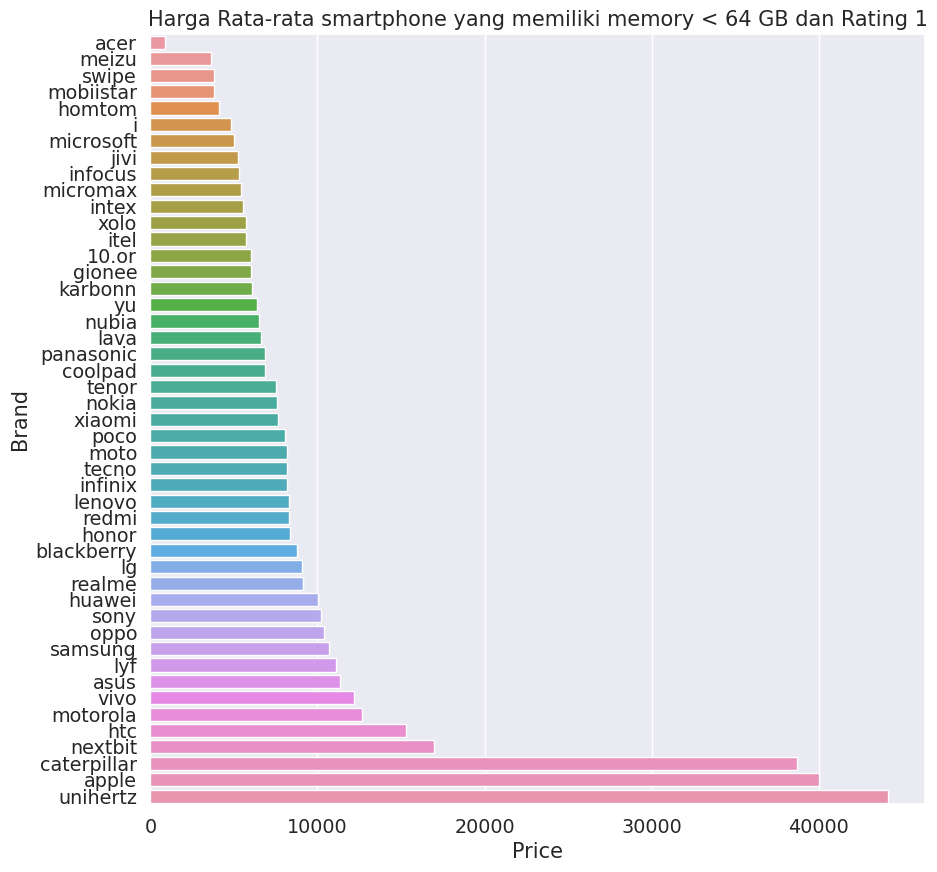

In [133]:
# Jawab

# -----------------------------------------------------------------------------------------------------------------------------------------
""" Asumsi: untuk merk smartphone dianggap case insensitive, contoh: apabila ada brand samsung atau Samsung, maka dianggap sama."""
# -----------------------------------------------------------------------------------------------------------------------------------------

new_smartphones = df[(df["Memory (GB)"] < 64) & (df["Rating"] == 1)].groupby(df["Brand"].str.lower()).mean().sort_values("Price", ascending=True)

plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.barplot(x = new_smartphones["Price"], y = new_smartphones.index, data = new_smartphones)
plt.title("Harga Rata-rata smartphone yang memiliki memory < 64 GB dan Rating 1")
plt.show()


Dapat dilihat bahwa merek smartphone yang memiliki harga rata-rata terendah adalah **Acer**.

##### Apa yang membuat smartphone dengan merek Acer memiliki harga rata-rata terendah dibandingkan merek smartphone lain?

In [134]:
df.corr(method='pearson')

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
Price,1.000000,0.279743,0.255461,0.276826,0.260423,0.659269,0.591847,0.014406,0.184664
Screensize (inches),0.279743,1.000000,0.725854,0.508298,0.531006,0.427751,0.602524,0.733120,0.389417
Camera_Nos,0.255461,0.725854,1.000000,0.546458,0.669166,0.416711,0.589898,0.632693,0.467579
Front Camera (MP),0.276826,0.508298,0.546458,1.000000,0.620479,0.387675,0.622373,0.331991,0.372598
Rear Camera (MP),0.260423,0.531006,0.669166,0.620479,1.000000,0.369280,0.622262,0.481070,0.522019
Memory (GB),0.659269,0.427751,0.416711,0.387675,0.369280,1.000000,0.709825,0.198526,0.257357
RAM (GB),0.591847,0.602524,0.589898,0.622373,0.622262,0.709825,1.000000,0.383067,0.437329
Battery (mAh),0.014406,0.733120,0.632693,0.331991,0.481070,0.198526,0.383067,1.000000,0.346563
Rating,0.184664,0.389417,0.467579,0.372598,0.522019,0.257357,0.437329,0.346563,1.000000


Dari tabel diatas, kita dapat melihat bahwa seluruh nilai pada tabel tersebut berupa nilai yang korelasi positif. Hal ini berarti seluruh variabel memiliki hubungan searah terhadap variabel lainnya walaupun tidak sepenuhnya hubungan searah yang kuat. Oleh karena itu, karena kita berbicara mengenai harga terendah, tentu saja atribut yang difokuskan adalah atribut "Price".

Pada tabel korelasi diatas, atribut price memiliki hubungan searah terhadap atribut lainnya. Hal ini mengimpilikasikan bahwa apabila atribut yang dimiliki pada smartphone rendah, maka cenderung harga rata-rata yang dijual juga rendah.

Akan tetapi, dapat dilihat atribut `Memory (GB)` dan `RAM (GB)` memiliki nilai korelasi yang cukup besar (>0.5) dibandingkan atribut-atribut lainnya. Oleh karena itu, saya akan membandingkan nilai-nilai dari smartphone dengan konsiderasi atribut tersebut.

In [135]:
# Smartphone yang memiliki memory < 64 GB dan rating bernilai 1

smartphone_low_memory_rating = df[(df["Memory (GB)"] < 64) & (df["Rating"] == 1)]

smartphone_low_memory_rating.describe()

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.0
mean,9602.088561,5.544170,1.409594,7.301107,11.673432,24.560886,2.476015,3401.675277,1.0
std,6879.886444,0.617925,0.636934,4.239737,3.783663,9.233342,0.799523,945.693000,0.0
min,905.000000,2.450000,1.000000,1.200000,5.000000,8.000000,1.000000,950.000000,1.0
25%,6344.000000,5.000000,1.000000,5.000000,8.000000,16.000000,2.000000,2800.000000,1.0
50%,7999.000000,5.500000,1.000000,5.000000,13.000000,32.000000,3.000000,3060.000000,1.0
75%,10099.500000,6.090000,2.000000,8.000000,13.000000,32.000000,3.000000,4000.000000,1.0
max,76019.000000,7.000000,4.000000,32.000000,48.000000,32.000000,4.000000,6000.000000,1.0


In [136]:
# Smartphone yang memiliki memory < 64 GB dan rating bernilai 1 dan bukan merek acer

smartphone_low_memory_rating_except_acer = smartphone_low_memory_rating[smartphone_low_memory_rating["Brand"].str.lower() != "acer"];

smartphone_low_memory_rating_except_acer.describe()

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.0
mean,9634.300000,5.546185,1.411111,7.320741,11.698148,24.622222,2.481481,3406.866667,1.0
std,6872.158859,0.618179,0.637626,4.235249,3.768708,9.195010,0.795918,943.572558,0.0
min,3317.000000,2.450000,1.000000,1.200000,5.000000,8.000000,1.000000,950.000000,1.0
25%,6421.000000,5.000000,1.000000,5.000000,8.000000,16.000000,2.000000,2800.000000,1.0
50%,7999.500000,5.500000,1.000000,5.000000,13.000000,32.000000,3.000000,3060.000000,1.0
75%,10149.250000,6.090000,2.000000,8.000000,13.000000,32.000000,3.000000,4000.000000,1.0
max,76019.000000,7.000000,4.000000,32.000000,48.000000,32.000000,4.000000,6000.000000,1.0


In [137]:
# Smartphone yang memiliki memory < 64 GB dan rating bernilai 1 dan merek acer

smartphone_low_memory_rating_with_acer = smartphone_low_memory_rating[smartphone_low_memory_rating["Brand"].str.lower() == "acer"];

smartphone_low_memory_rating_with_acer.describe()

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0
25%,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0
50%,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0
75%,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0
max,905.0,5.0,1.0,2.0,5.0,8.0,1.0,2000.0,1.0


Deskripsi data diatas adalah:
- smartphone_low_memory_rating: Smartphone yang memiliki memory < 64 GB dan rating bernilai 1
- smartphone_low_memory_rating_except_acer: Smartphone yang memiliki memory < 64 GB dan rating bernilai 1 dan bukan merek acer
- smartphone_low_memory_rating_with_acer: Smartphone yang memiliki memory < 64 GB dan rating bernilai 1 dan merek acer

Berdasarkan tampilan data diatas, dapat dilihat bahwa **rata-rata** dari atribut yang saya tekankan diatas (`Memory (GB)` dan `RAM (GB)`) pada brand acer dibandingkan brand yang bukan acer pada smartphone yang memiliki memory < 64 GB dan rating 1 **selalu lebih rendah**.
- Memory:
  - Acer: 8GB
  - Bukan Acer: 24.6 GB
- RAM:
  - Acer: 1GB
  - Bukan Acer: 2.4 GB

Hal ini menunjukkan bahwa spesifikasi yang dimiliki Acer jauh lebih rendah untuk lingkup smartphonenya (Memory < 64 GB dan Rating = 1). TIdak hanya itu, karena kedua atribut tersebut berkorelasi positif kuat dengan harga, maka apabila kedua atribut tersebut rendah, maka harga **cenderung** rendah juga.

Bukan hanya atribut itu, **SELURUH ATRIBUT** yang acer miliki lebih rendah atau sama dengan dari rata-rata. Hal ini menjadi pokok fondasi kita akan mengapa harga rata-rata merek smartphone acer tersebut sangatlah rendah.  

Namun, mari kita bandingkan merek Acer dengan merek smartphone yang memiliki harga rata-rata terdendah kedua dibandingkan acer yaitu Meizu.

In [138]:
# Smartphone yang memiliki memory < 64 GB dan rating bernilai 1 dan merek meizu

smartphone_low_memory_rating_with_meizu = smartphone_low_memory_rating[smartphone_low_memory_rating["Brand"].str.lower() == "meizu"];

smartphone_low_memory_rating_with_meizu.describe()

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
count,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,3633.0,5.45,1.0,8.0,13.0,16.0,2.0,3000.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3633.0,5.45,1.0,8.0,13.0,16.0,2.0,3000.0,1.0
25%,3633.0,5.45,1.0,8.0,13.0,16.0,2.0,3000.0,1.0
50%,3633.0,5.45,1.0,8.0,13.0,16.0,2.0,3000.0,1.0
75%,3633.0,5.45,1.0,8.0,13.0,16.0,2.0,3000.0,1.0
max,3633.0,5.45,1.0,8.0,13.0,16.0,2.0,3000.0,1.0


Bahkan apabila dibandingkan dengan merek smartphone meizu (smartphone dengan rata-rata terendah setelah acer), **SELURUH ATRIBUT** yang dimiliki acer lebih rendah atau sama dengan atribut yang merek smartphone meizu miliki.

Sehingga kesimpulannya, karena korelasi seluruh atribut merupakan korelasi positif, maka karena atribut yang smartphone acer miliki sangat rendah dibandingkan merek smartphone lain, membuat acer memiliki harga terendah dibandingkan smartphone lain.